#### Lib Import

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import algorythm as alg
import math
from sklearn.cluster import KMeans


In [30]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/2_18.02-25.02.csv', header=0, sep =',')

In [31]:
data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 1]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
#data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]
#data1 = data1.loc[data1['ts'] < 1644576965032]

In [32]:
print(type(data1))

<class 'pandas.core.frame.DataFrame'>


In [33]:
clusters = alg.clusterise(data1,number_of_clusters=6)

220
662
659
30
513
350


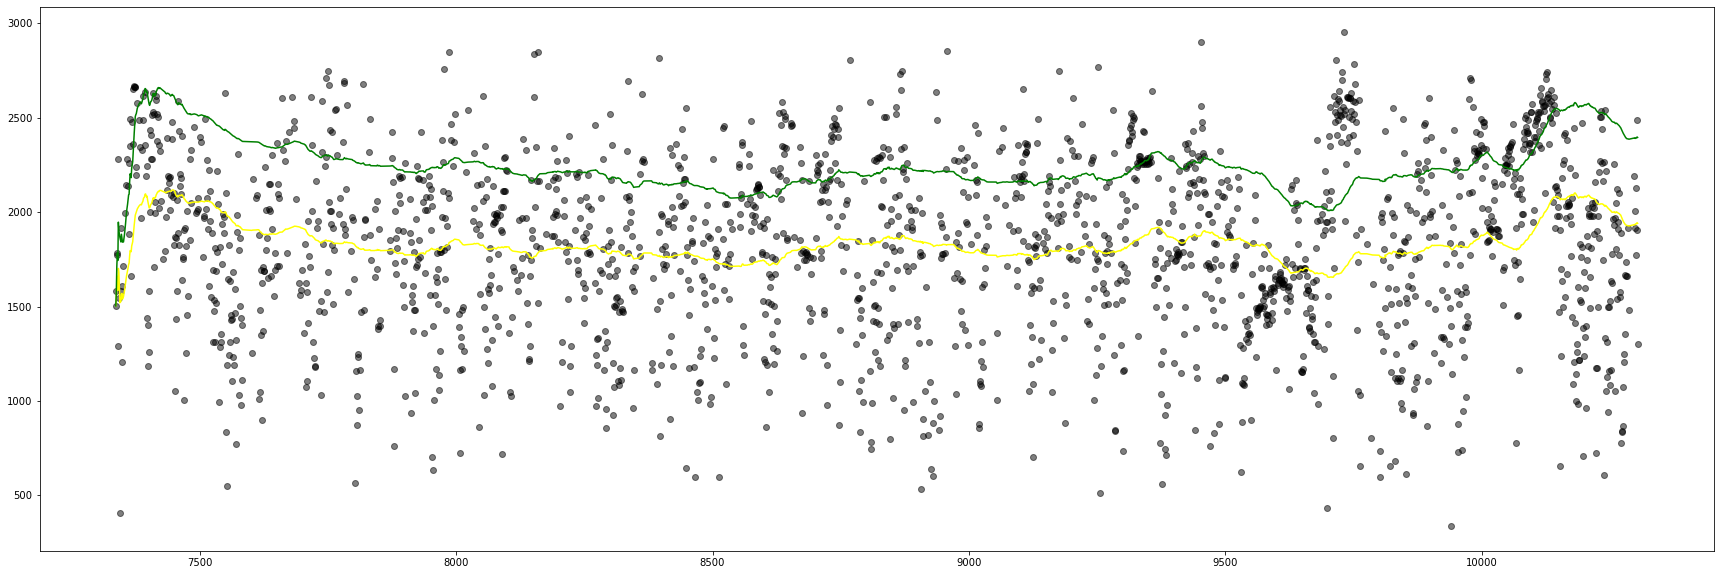

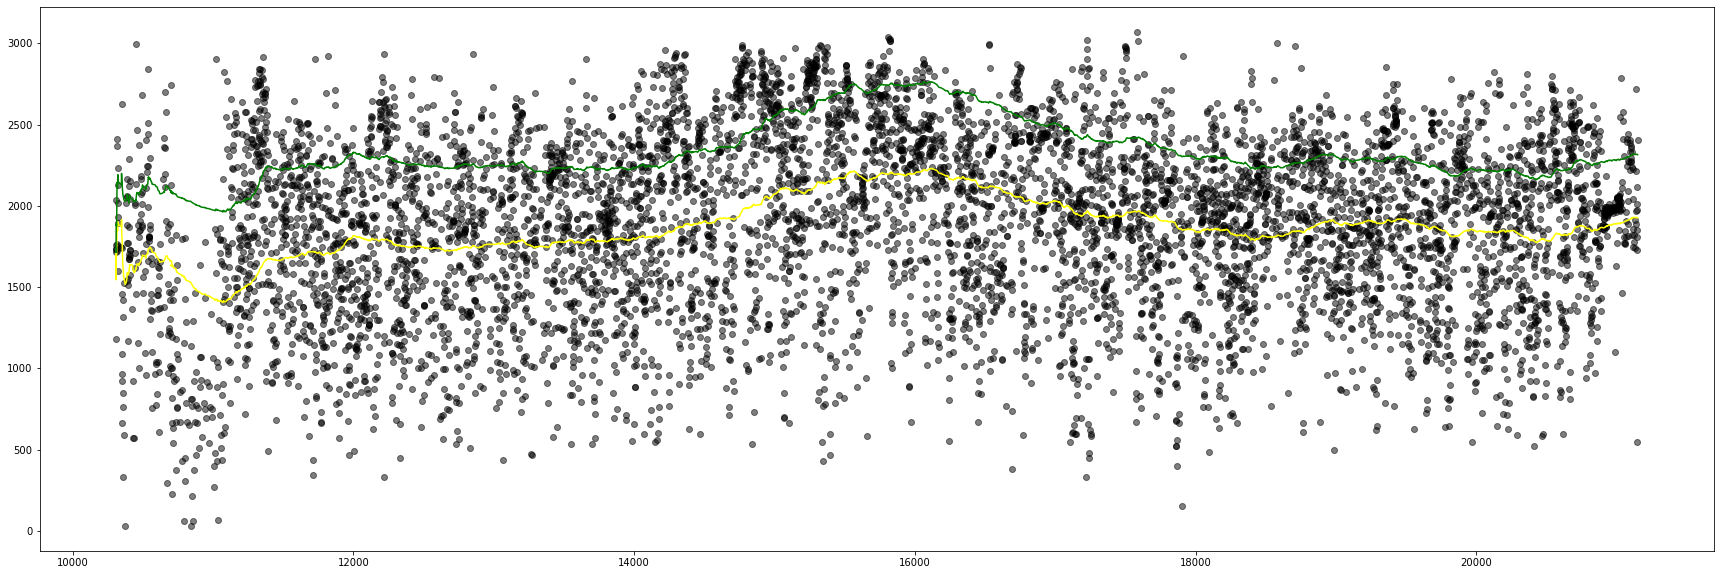

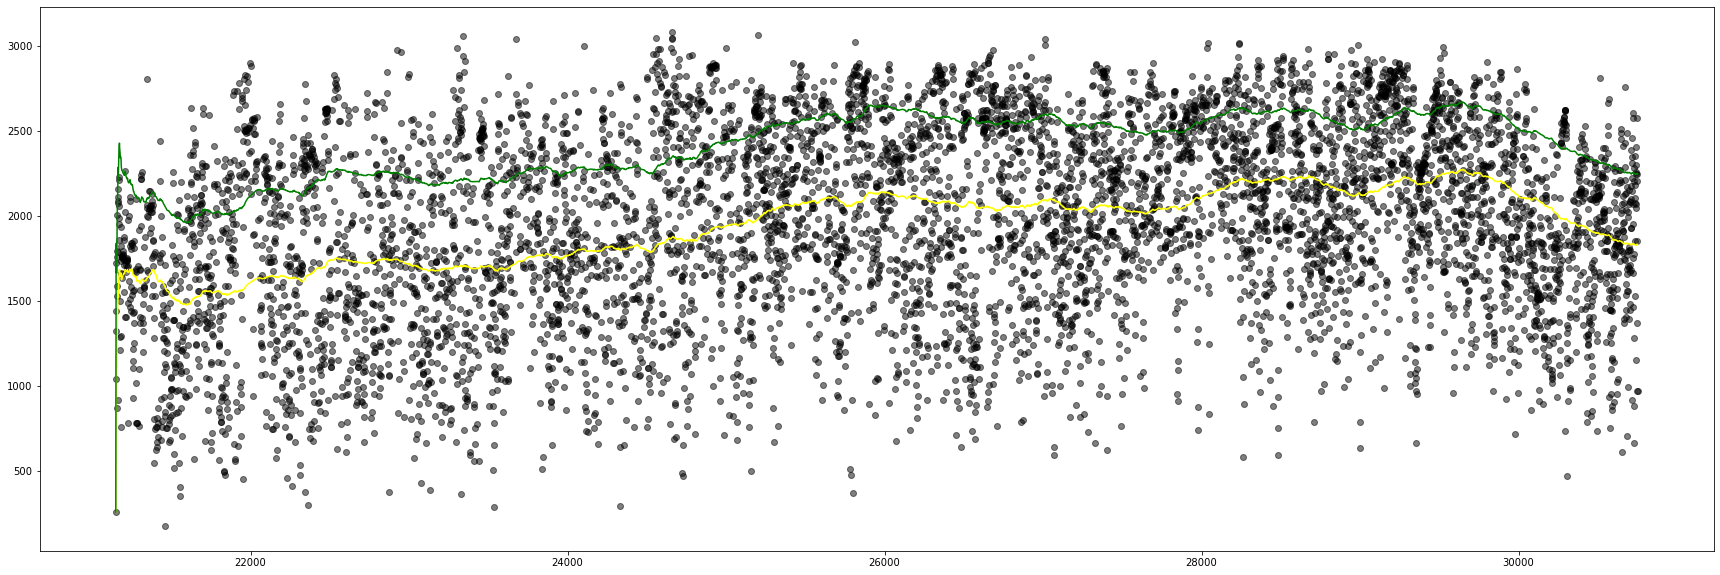

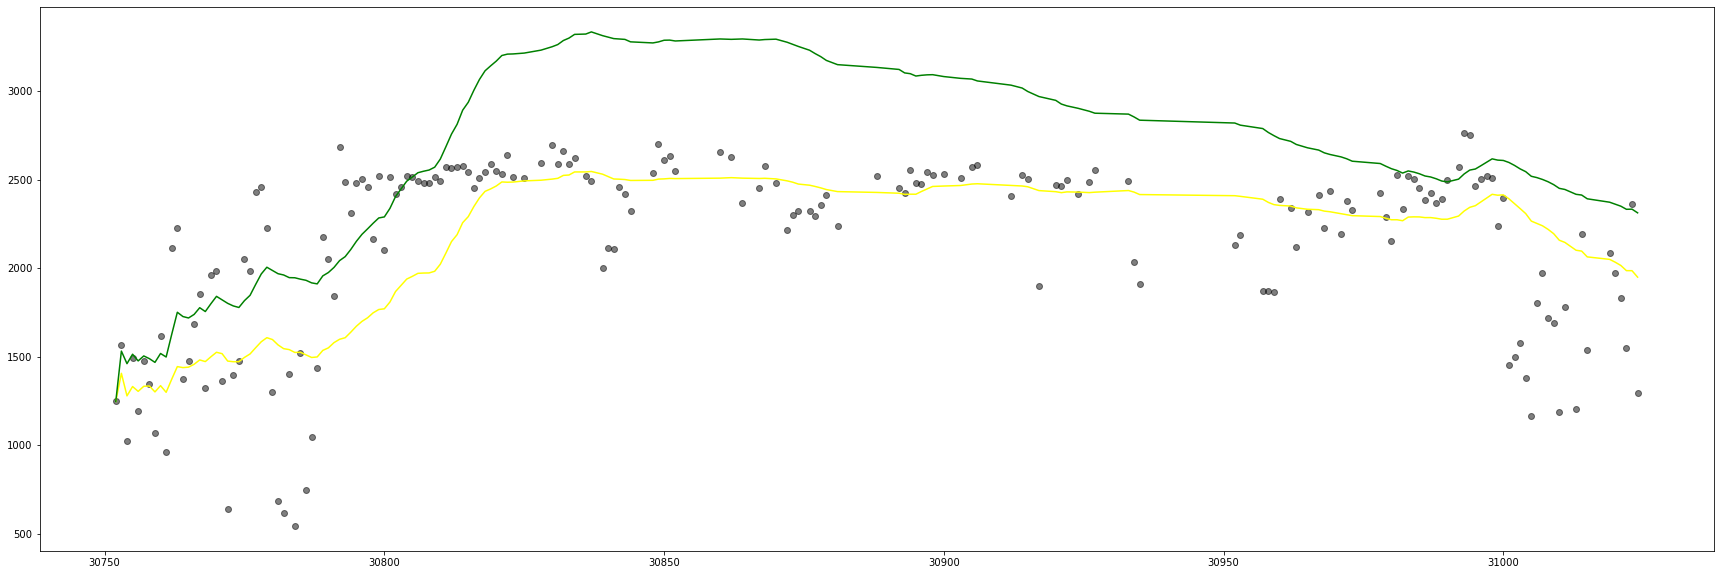

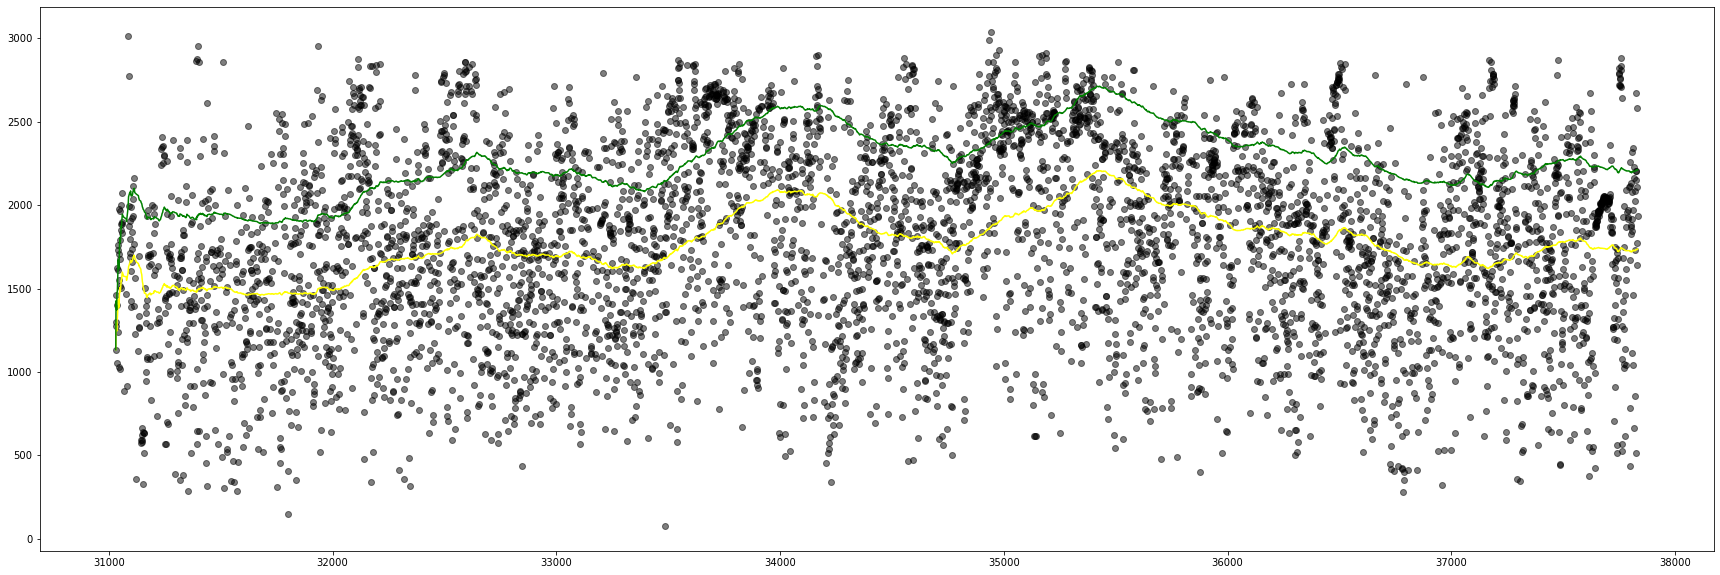

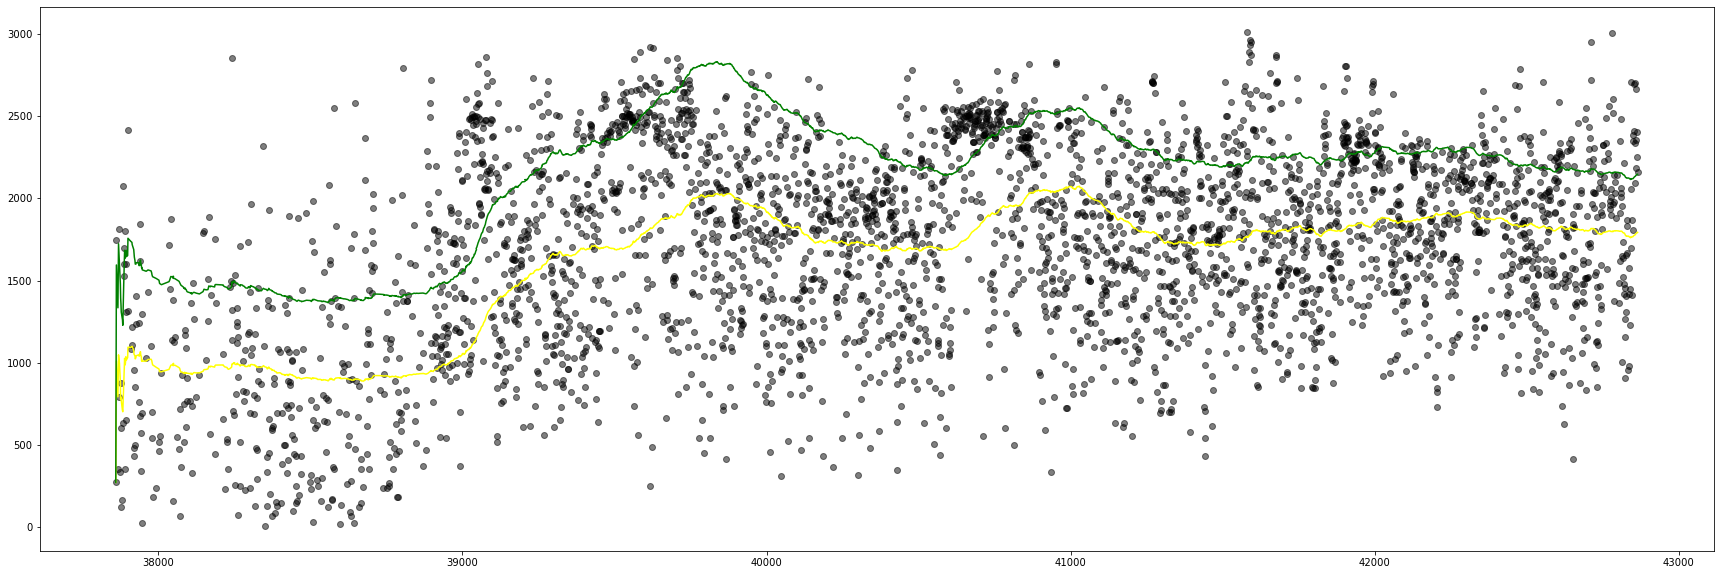

In [39]:
for item in clusters:
    main_mean_list = f.mean_list(item)
    algo_set_avg = alg.create_trend(main_mean_list, close_data_size=len(item)//100, ratio=0)
    print(len(item)//100)
    mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size=len(item)//50, ratio=0)
    border = algo_set_avg + mean_set_avg
    fig = plt.figure(figsize=(30, 10))
    plot = fig.add_subplot(111)
    plot.scatter(item['id'].unique(), main_mean_list, color='black', alpha=0.5)
    plot.plot(item['id'].unique(), algo_set_avg, color='yellow')
    plot.plot(item['id'].unique(), border, color='green')


In [35]:
main_mean_list = f.mean_list(data1)
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 50, ratio = 0)
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 50, ratio=0)
border = algo_set_avg + mean_set_avg

Text(0.5, 1.0, 'Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.')

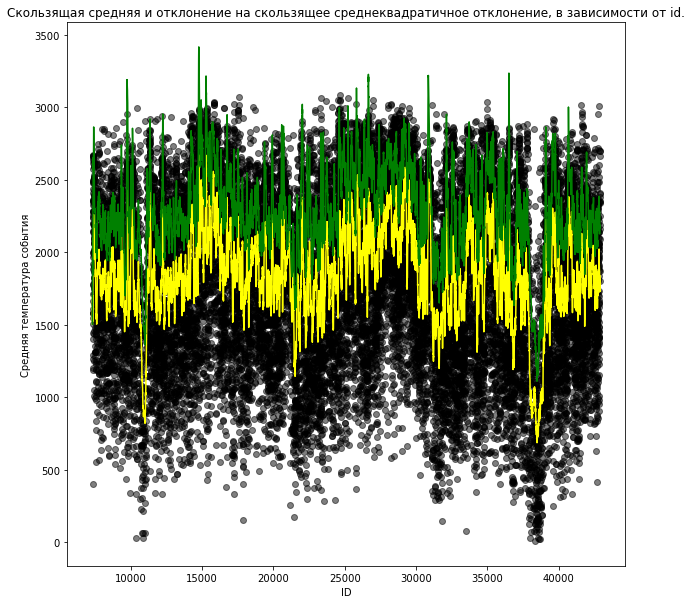

In [36]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot(111)
plot.scatter(data1['id'].unique(),main_mean_list, color = 'black', alpha=0.5)
plot.plot(data1['id'].unique(), algo_set_avg, color = 'yellow')
plot.plot(data1['id'].unique(), border, color = 'green')
plot.set_xlabel('ID')
plot.set_ylabel('Средняя температура события')
plot.set_title("Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.")